<a href="https://colab.research.google.com/github/nascimento-luciano/Artificial-Intelligence/blob/master/Sintese_Analise_COVID_19_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2ª Etapa - Construção da Plotagem e do Modelo de Predição de Casos de Confirmados no Brasil

In [859]:
#---------------------------------Parte 1---------------------------------------
#Importanto bibliotecas

#Importa uma biblioteca que consiste em objetos de matriz multidimensionais
#e uma coleção de rotinas para processar essas matrizes
import numpy as np

#Importa uma biblioteca de python usada para manipulação e análise de dados
#Através dela podemos fazer manipulação e análise de dados usando pandas
import pandas as pd

#matplotlib.pyplot é uma interface baseada em estado para matplotlib
#Uma vez que fornece uma forma implícita, semelhante ao MATLAB, de plotagem
#E também abre figuras na tela e atua como o gerenciador de GUI da figura
import matplotlib

#Importa uma biblioteca de plotagem para a linguagem de programação Python 
#e sua extensão numérica de matemática NumPy
import matplotlib.pyplot as plt

#Importa ferramentas de plotagem off-line, iplot para o Notebook Jupyter e plot para uso comum
from plotly.offline import iplot, init_notebook_mode

#Importe o pacote tensorflow usando:
import tensorflow as tf

import sklearn
#train_test_split é uma função em Sclearn seleção de modelo 
#para dividir matrizes de dados em dois subconjuntos: para dados de treinamento e para teste de dados
from sklearn.model_selection import train_test_split

#Para cada valor em um recurso, MinMaxScaler subtrai o valor mínimo
# no recurso e depois divide pelo intervalo
from sklearn.preprocessing import MinMaxScaler

In [860]:
#---------------------------------Parte 2---------------------------------------
#Construindo o DataFrame a partir de um arquivo CSV.
train = pd.DataFrame(pd.read_csv('train.csv'))
submission_example =pd.read_csv('submission.csv')

In [861]:
#Plotagem da forma de treinamento
print("A forma dos dados de treinamento é = {}".format(train.shape))

A forma dos dados de treinamento é = (35995, 6)


In [862]:
#---------------------------------Parte 3---------------------------------------
#Considerando para o treinamento os dados das Provincias, Casos Confirmados e Fatalidades
train.Province_State.fillna("", inplace = True)
train.ConfirmedCases.fillna("", inplace = True)
train.Fatalities.fillna("", inplace = True)

In [863]:
#---------------------------------Parte 4---------------------------------------
#Treinamento exibe a forma matricial dos países com casos confirmados de COVID-19
train["Country_Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

In [864]:
#---------------------------------Parte 5---------------------------------------
#Aqui separamos os casos confimados e os casos fatais de COVID-19 no Brazil
confirmed_cases_brazil = train[train["Country_Region"] == "Brazil"].groupby(["Date"]).ConfirmedCases.sum()
fatal_cases_brazil = train[train["Country_Region"] == "Brazil"].groupby(["Date"]).Fatalities.sum()

In [865]:
#---------------------------------Parte 6---------------------------------------
#Fazendo o treinamento para Paíse/Região
train_brazil = train[train["Country_Region"] == "Brazil"]
train_brazil

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
3450,3451,,Brazil,2020-01-22,0.0,0.0
3451,3452,,Brazil,2020-01-23,0.0,0.0
3452,3453,,Brazil,2020-01-24,0.0,0.0
3453,3454,,Brazil,2020-01-25,0.0,0.0
3454,3455,,Brazil,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
3560,3561,,Brazil,2020-05-11,169594.0,11653.0
3561,3562,,Brazil,2020-05-12,178214.0,12461.0
3562,3563,,Brazil,2020-05-13,190137.0,13240.0
3563,3564,,Brazil,2020-05-14,203165.0,13999.0


In [866]:
#---------------------------------Parte 7--------------------------------------
#Analisando os casos confimados e casos fatais
train_brazil["ConfirmedCases"] = train_brazil["ConfirmedCases"].astype(int)
train_brazil["Fatalities"] = train_brazil["Fatalities"].astype(int)

In [867]:
#---------------------------------Parte 8---------------------------------------
#Aqui vemos o tamanho do treinamento e da validação 
train_brazil_size = int(len(train_brazil) * 0.75)
val_brazil_size = len(train_brazil) - train_brazil_size
print("Training size = {}".format(train_brazil_size))
print("Validation size = {}".format(val_brazil_size))

Training size = 86
Validation size = 29


In [868]:
#---------------------------------Parte 9---------------------------------------
#Treinamento os casos confimados e casos fatais
train_brazil_confirmed_cases = train_brazil[["ConfirmedCases"]]
train_brazil_fatal_cases = train_brazil[["Fatalities"]]

In [869]:
#PLotagem do casos confirmados e fatais em forma de matriz
print(train_brazil_confirmed_cases, train_brazil_fatal_cases)

      ConfirmedCases
3450               0
3451               0
3452               0
3453               0
3454               0
...              ...
3560          169594
3561          178214
3562          190137
3563          203165
3564          220291

[115 rows x 1 columns]       Fatalities
3450           0
3451           0
3452           0
3453           0
3454           0
...          ...
3560       11653
3561       12461
3562       13240
3563       13999
3564       14962

[115 rows x 1 columns]


Text(0, 0.5, 'Casos Confirmados')

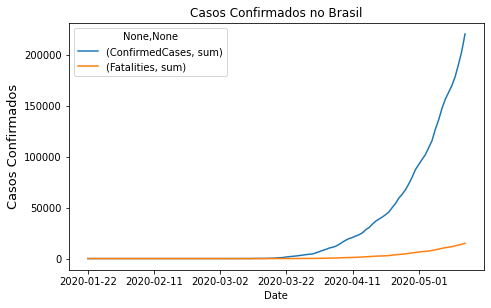

In [887]:
#---------------------------------Parte 11--------------------------------------
#Plotagem dos casos confirmados e casos fatais de Janeiro a Maio (2020)
confirmed_total_date = train.groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date = train.groupby(['Date']).agg({'Fatalities':['sum']})
total_date = confirmed_total_date.join(fatalities_total_date)

confirmed_total_date_Brazil = train[train['Country_Region']=='Brazil'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Brazil= train[train['Country_Region']=='Brazil'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Brazil = confirmed_total_date_Brazil.join(fatalities_total_date_Brazil)

plt.figure(figsize=(16.36,10))
plt.subplot(2, 2, 1)
total_date_Brazil.plot(ax=plt.gca(), title='Casos Fatais e Confirmados no Brasil')
plt.ylabel("Casos Confirmados", size=13)


In [871]:
#---------------------------------Parte 12--------------------------------------
#O comando len () é uma função embutida que retorna o comprimento (número de itens) de um objeto.
len(train_brazil_confirmed_cases)

115

In [872]:
#---------------------------------Parte 13--------------------------------------
#Treinamento dos casos confirmados de COVID-19 no Brasil
train_brazil_confirmed_cases

,ConfirmedCases
3450,0
3451,0
3452,0
3453,0
3454,0
...,...
3560,169594
3561,178214
3562,190137
3563,203165


In [873]:
#---------------------------------Parte 14--------------------------------------
#Aqui usa-se o iloc para indexação / seleção por posição baseada em localização de inteiros.
train_brazil_confirmed_cases_data = train_brazil_confirmed_cases.iloc[0:train_brazil_size]
val_brazil_confirmed_cases_data = train_brazil_confirmed_cases.iloc[train_brazil_size : len(train_brazil_confirmed_cases)]

In [874]:
#---------------------------------Parte 15--------------------------------------
#Plotagem da fixação de inteiros; treinamento e validação de casos
print(len(train_brazil_confirmed_cases_data))
print(len(val_brazil_confirmed_cases_data))

86
29


In [875]:
#---------------------------------Parte 16--------------------------------------
#O MinMaxScaler faz a estimação de escala e traduz cada recurso individualmente, 
#de modo que esteja no intervalo especificado no conjunto de treinamento, por exemplo. entre zero e um.
scaler = MinMaxScaler(feature_range = (0,1))
def createDataset(train) : 
    train_scaled = scaler.fit_transform(train)
    x_train = [] 
    y_train = []
    time_step = 2
    for i in range(time_step, train_scaled.shape[0]):
        x_train.append(train_scaled[i-time_step : i , 0])
        y_train.append(train_scaled[i, 0])
    
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1 ))
    y_train = np.reshape(y_train, (y_train.shape[0], 1 ))
    return x_train, y_train     

In [876]:
#---------------------------------Parte 17--------------------------------------
#Aqui será definido a criação do dataset (train)
def createDataset(train) : 
    train_scaled = scaler.fit_transform(train)
    x_train = [] 
    y_train = []
    time_step = 2
    for i in range(time_step, train_scaled.shape[0]):
        x_train.append(train_scaled[i-time_step : i , 0])
        y_train.append(train_scaled[i, 0])
    
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1 ))
    y_train = np.reshape(y_train, (y_train.shape[0], 1 ))
    return x_train, y_train   

In [877]:
#---------------------------------Parte 18--------------------------------------
#Conjunto de dados para treinar o respectivo modelo de aprendizado
x_train, y_train = createDataset(train_brazil_confirmed_cases_data)
x_val, y_val = createDataset(val_brazil_confirmed_cases_data)

In [878]:
#---------------------------------Parte 19--------------------------------------
#Plotagem do modelo de aprendizado
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(84, 2, 1) (84, 1)
(27, 2, 1) (27, 1)


In [879]:
#---------------------------------Parte 20--------------------------------------
#Um Sequential () modelo é apropriado para uma pilha de camadas simples, 
#onde cada camada tem exactamente um tensor de entrada e um tensor de saída.

#Aqui é criado e configurado a rede neural LSTM  que cria camada longa de memória de curto prazo
#A camada Dropout define aleatoriamente as unidades de entrada para 0 
#com uma frequência de taxa em cada etapa durante o tempo de treinamento

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 1))

In [880]:
#Compilação do modelo de treinamento
model.compile(tf.keras.optimizers.Adam(lr = 0.001), loss = "mean_squared_error", metrics=['accuracy'])

In [881]:
#Sumário com o modelo de treinamento
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_100 (LSTM)             (None, 2, 50)             10400     
                                                                 
 dropout_100 (Dropout)       (None, 2, 50)             0         
                                                                 
 lstm_101 (LSTM)             (None, 2, 50)             20200     
                                                                 
 dropout_101 (Dropout)       (None, 2, 50)             0         
                                                                 
 lstm_102 (LSTM)             (None, 2, 50)             20200     
                                                                 
 dropout_102 (Dropout)       (None, 2, 50)             0         
                                                                 
 lstm_103 (LSTM)             (None, 50)              

In [882]:
#---------------------------------Parte 21--------------------------------------
#Um epoch é uma iteração sobre todos os dados x e y fornecidos.
#Um batch_size é o tamanho do lote é um termo usado no aprendizado de máquina, 
#e se refere ao número de exemplos de treinamento utilizados em uma iteração
#sobre todos os dados x e y fornecidos.
EPOCHS = 200
BATCH_SIZE = 1

In [883]:
#---------------------------------Parte 22--------------------------------------
#É possível usar as informações da variável “ history ” para
#verificar a evolução da função de loss e da métrica
with tf.device("/device:GPU:0"):
  history = model.fit(x_train, y_train,epochs = EPOCHS, verbose = 1,
                     batch_size = BATCH_SIZE, validation_data = (x_val, y_val))

Epoch 1/200
84/84 [==============================] - 9s 27ms/step - loss: 0.0591 - accuracy: 0.3929 - val_loss: 0.1085 - val_accuracy: 0.0000e+00
Epoch 2/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0268 - accuracy: 0.4048 - val_loss: 0.0722 - val_accuracy: 0.0370
Epoch 3/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0091 - accuracy: 0.4048 - val_loss: 0.0264 - val_accuracy: 0.0370
Epoch 4/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0040 - accuracy: 0.4048 - val_loss: 0.0052 - val_accuracy: 0.0370
Epoch 5/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0041 - accuracy: 0.4048 - val_loss: 0.0063 - val_accuracy: 0.0370
Epoch 6/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0052 - accuracy: 0.4048 - val_loss: 0.0130 - val_accuracy: 0.0370
Epoch 7/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0059 - accuracy: 0.4048 - val_loss: 0.0063 - val_accuracy: 0.0370
Epoch 8/

In [884]:
model.evaluate(x_train,  y_train, verbose=2)

3/3 - 2s - loss: 4.4692e-04 - accuracy: 0.4048 - 2s/epoch - 558ms/step


[0.0004469212726689875, 0.4047619104385376]

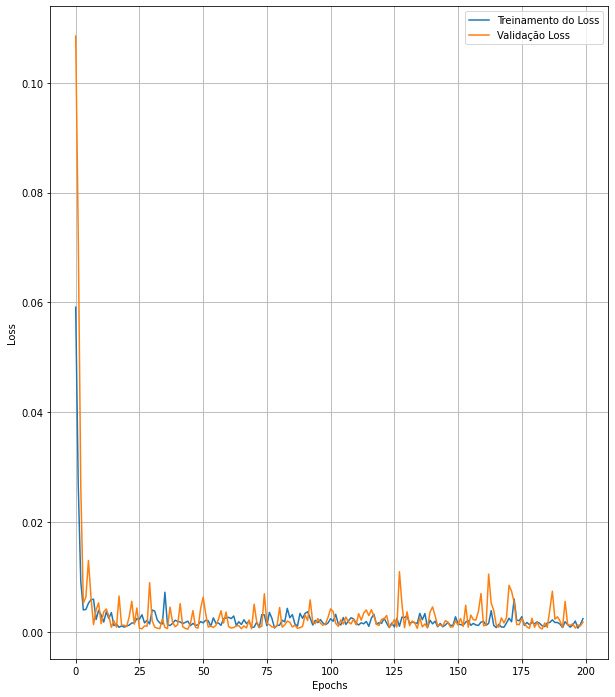

In [885]:
#---------------------------------Parte 23--------------------------------------
#Plotagem do treinamento e validação do Loss
x = np.arange(0, EPOCHS, 1)                                                                  
plt.figure(1, figsize = (22, 12))                                  
plt.subplot(121)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(x, history.history["loss"], label = "Treinamento do Loss")
plt.plot(x, history.history["val_loss"], label = "Validação Loss")
plt.grid(True)
plt.legend()  

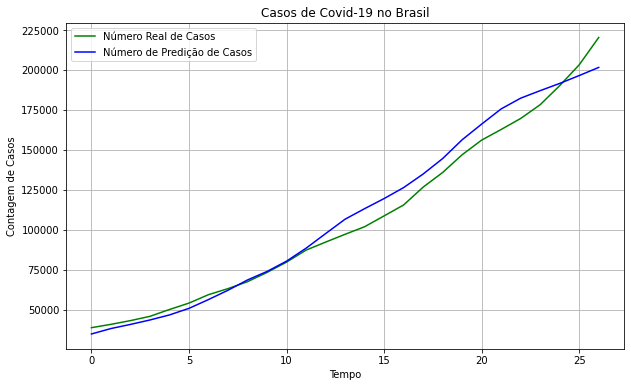

<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

In [900]:
#---------------------------------Parte 24--------------------------------------
#Aqui é possível usar os dados de teste do dataset para,
# essa rede neural treinada, e assim prever as saídas que a rede desconhece
#A seguir são apresentados os casos reais e uma predição rede não conhece;
predicted_cases = model.predict(x_val)
predicted_cases = scaler.inverse_transform(predicted_cases)
real_cases = scaler.inverse_transform(y_val)
plt.figure(figsize= (10, 6))
plt.subplot(1,1,1)
plt.plot(real_cases, color = "green", label = "Número Real de Casos")
plt.plot(predicted_cases, color = "blue", label = "Número de Predição de Casos")
plt.title("Casos de Covid-19 no Brasil")
plt.xlabel("Tempo")
plt.ylabel("Contagem de Casos")
plt.legend()
plt.grid("both")
plt.show()
plt.figure(figsize=(14, 8))